In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

In [3]:
df = pd.read_csv('../alzheimers_disease_data.csv')

In [4]:
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [5]:
df = df.drop(['PatientID', 'DoctorInCharge'], axis=1)

In [6]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness         

In [ ]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
X_test_scaled

array([[-0.65455233,  0.99015895, -0.70353326, ..., -0.42118554,
        -0.43356098,  1.50600825],
       [-0.32185704, -1.00993886, -0.70353326, ..., -0.42118554,
        -0.43356098, -0.66400699],
       [ 0.56533038, -1.00993886, -0.70353326, ..., -0.42118554,
        -0.43356098,  1.50600825],
       ...,
       [ 0.89802567,  0.99015895, -0.70353326, ..., -0.42118554,
        -0.43356098, -0.66400699],
       [ 0.56533038,  0.99015895, -0.70353326, ...,  2.37425054,
        -0.43356098, -0.66400699],
       [ 1.34161938,  0.99015895, -0.70353326, ..., -0.42118554,
        -0.43356098, -0.66400699]], shape=(430, 32))

In [9]:
X_train_scaled

array([[ 1.23072095, -1.00993886,  1.29874103, ..., -0.42118554,
        -0.43356098,  1.50600825],
       [-1.43084133,  0.99015895, -0.70353326, ..., -0.42118554,
        -0.43356098, -0.66400699],
       [ 0.01083824, -1.00993886, -0.70353326, ..., -0.42118554,
        -0.43356098, -0.66400699],
       ...,
       [ 0.01083824,  0.99015895,  2.29987818, ..., -0.42118554,
        -0.43356098, -0.66400699],
       [ 0.12173667,  0.99015895, -0.70353326, ..., -0.42118554,
        -0.43356098, -0.66400699],
       [-0.87634919,  0.99015895, -0.70353326, ..., -0.42118554,
        -0.43356098, -0.66400699]], shape=(1719, 32))

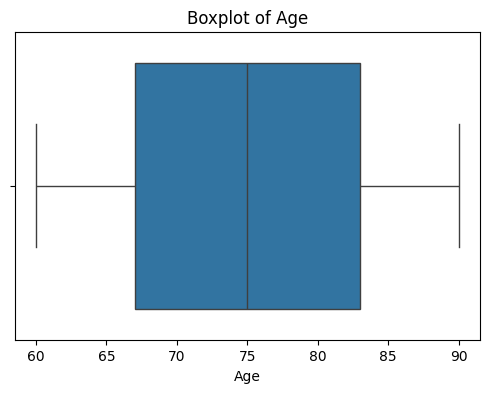

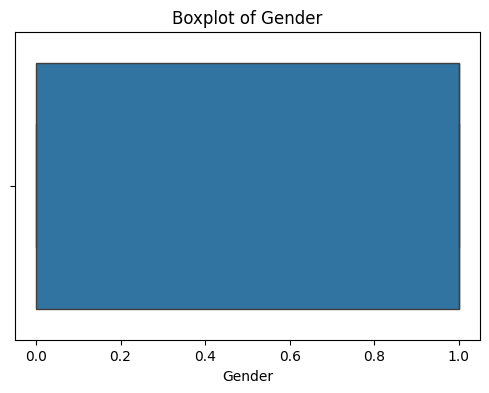

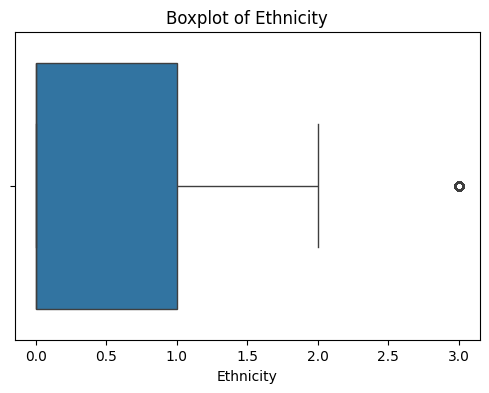

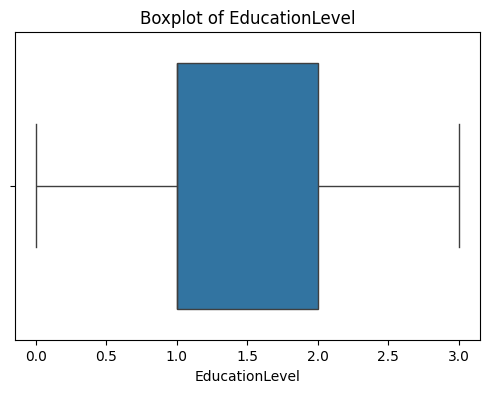

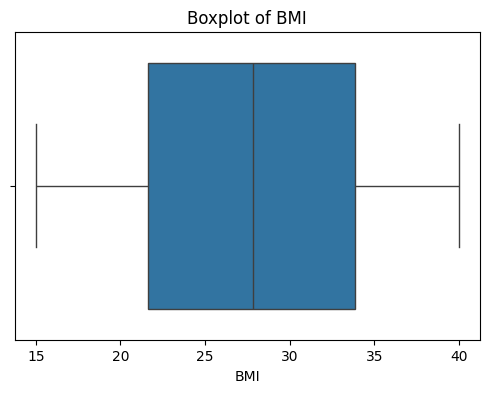

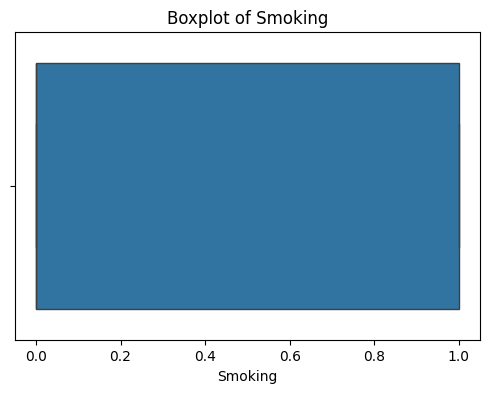

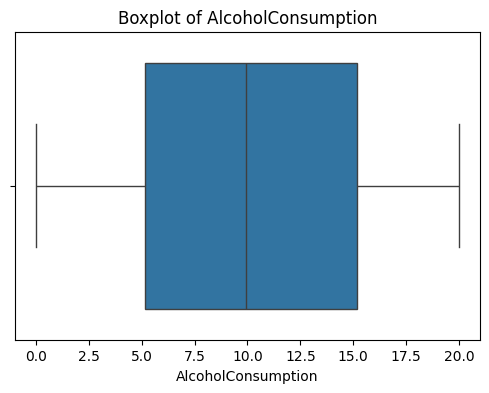

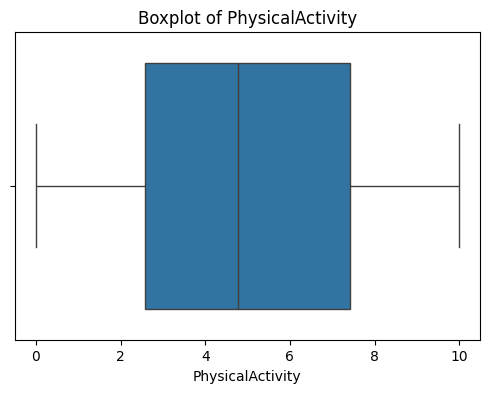

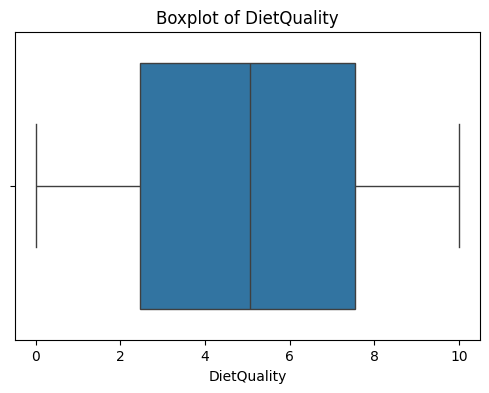

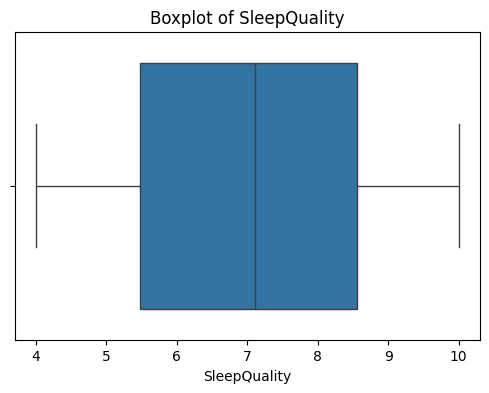

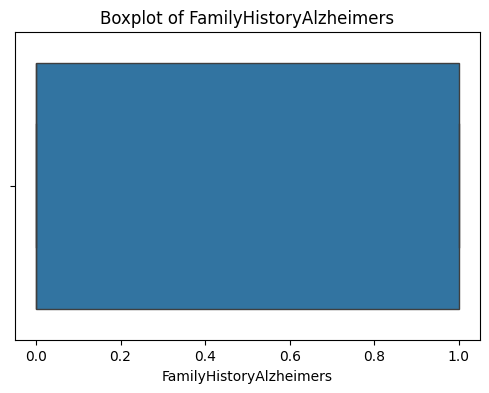

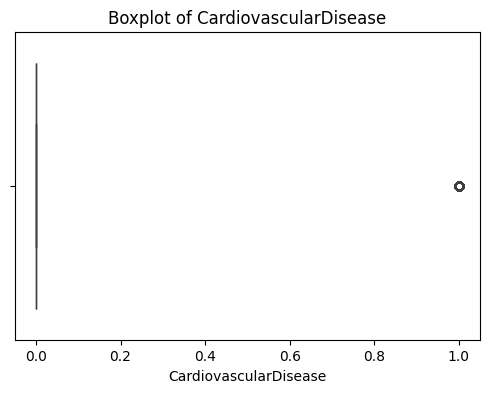

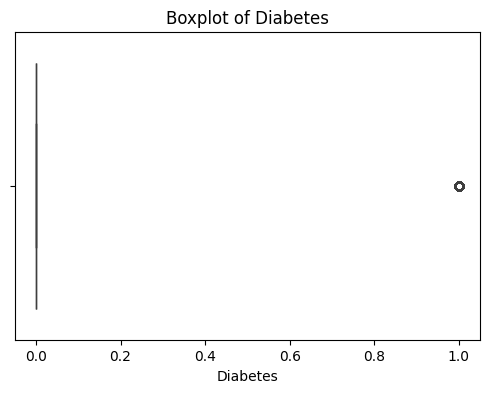

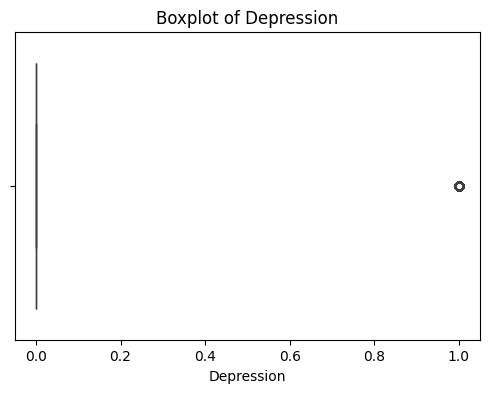

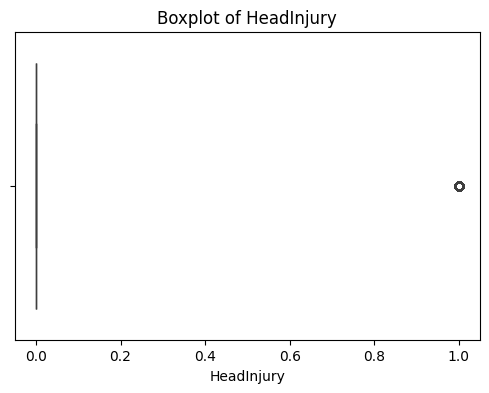

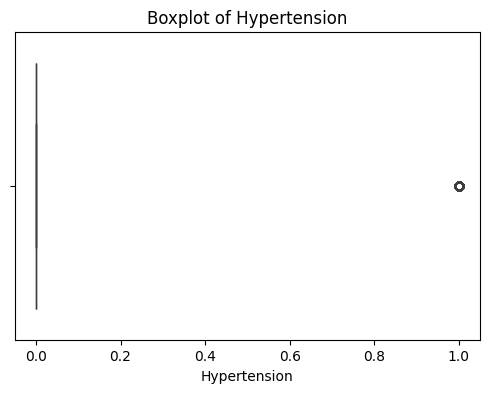

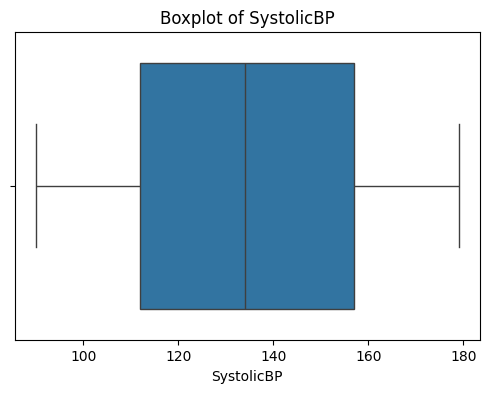

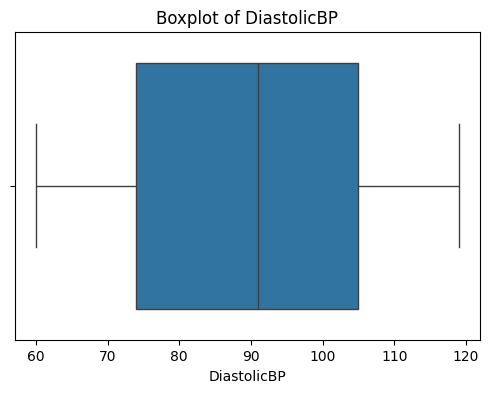

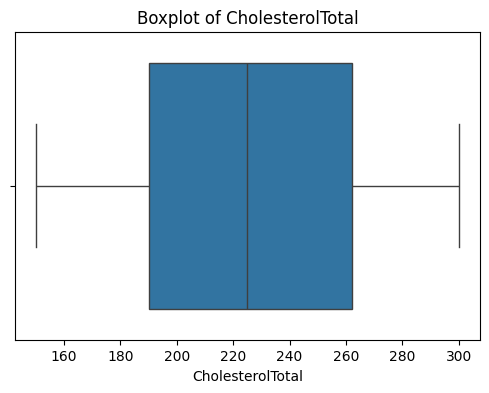

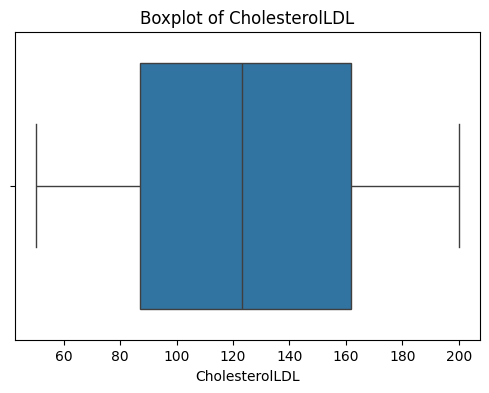

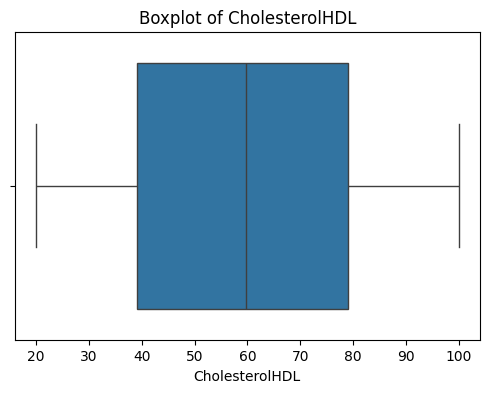

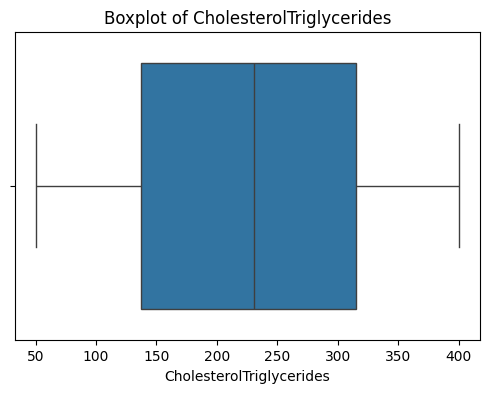

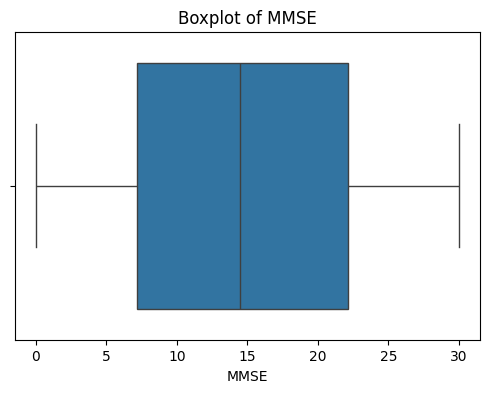

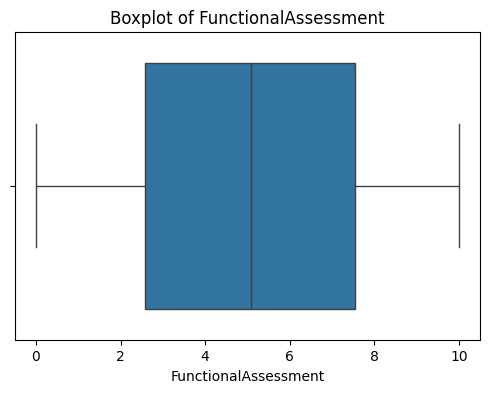

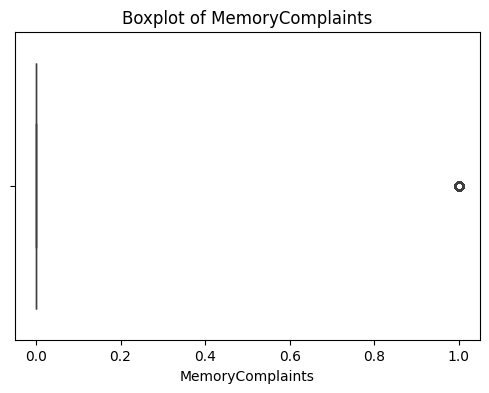

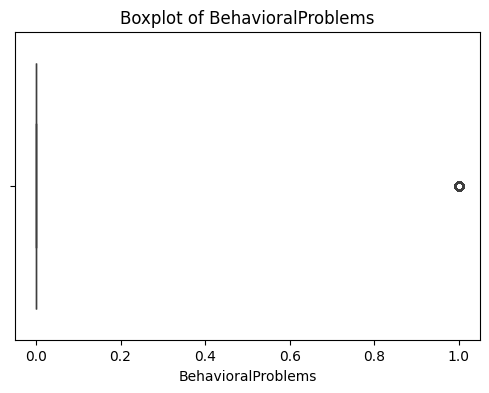

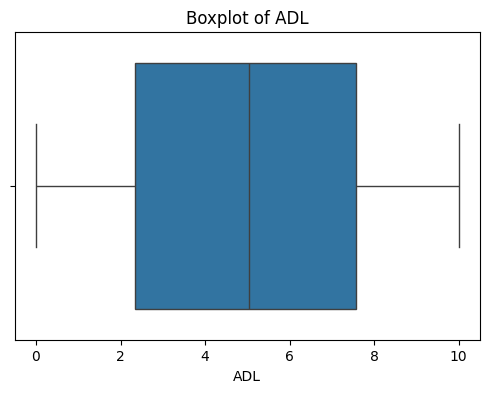

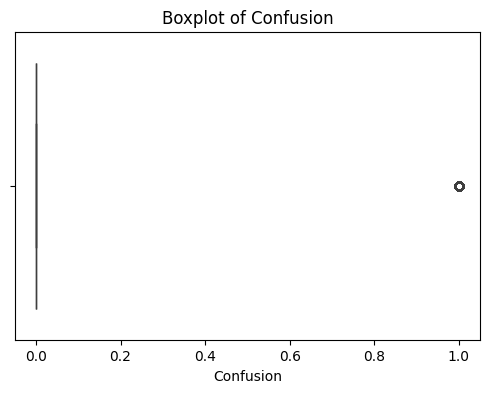

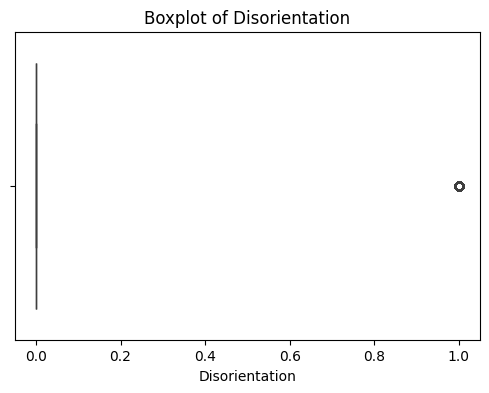

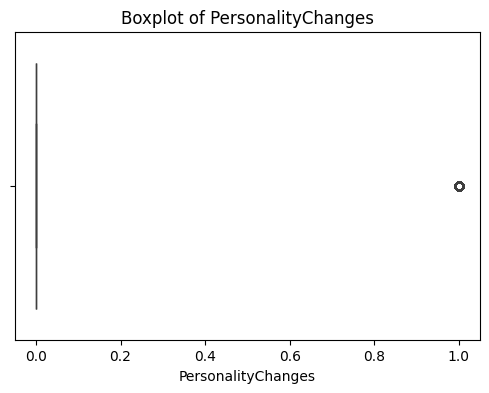

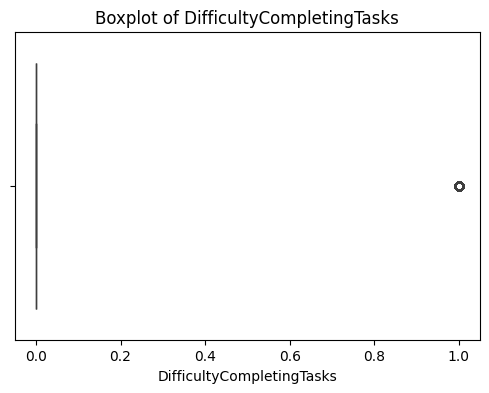

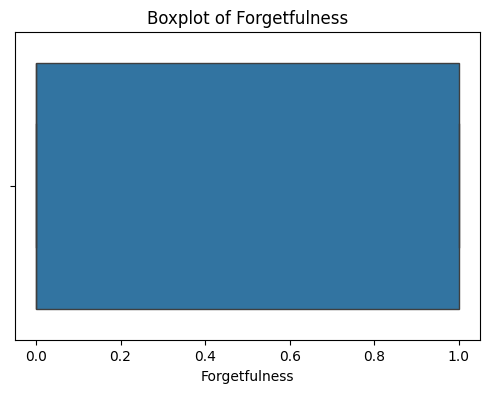

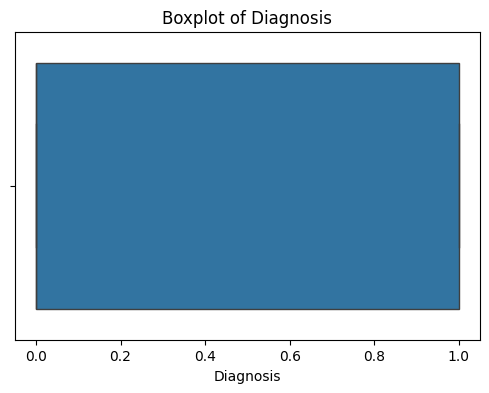

In [10]:
# Check for Outlier
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
# LOGISTIC REGRESSION NO HYPERPARAMETER TUNING

logreg_model = LogisticRegression(
    penalty='l2',
    C=1.0,              
    solver='liblinear', 
    class_weight='balanced',  
    random_state=42
)

logreg_model.fit(X_train_scaled, y_train)

# === Evaluation on Training Set ===
y_train_pred = logreg_model.predict(X_train_scaled)
print("\n--- Logistic Regression Training Set Evaluation ---")
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# === Evaluation on Validation Set ===
y_val_pred = logreg_model.predict(X_val_scaled)
print("\n--- Logistic Regression Validation Set Evaluation ---")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

# === Evaluation on Test Set ===
y_test_pred = logreg_model.predict(X_test_scaled)
print("\n--- Logistic Regression Test Set Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# === Save model ===
import pickle
with open('alzheimer_model_logreg.pkl', 'wb') as f:
    pickle.dump(logreg_model, f)

print("\nLogistic Regression model saved as 'alzheimer_model_logreg.pkl'")


--- Logistic Regression Training Set Evaluation ---
Accuracy: 0.8295520651541594

--- Logistic Regression Validation Set Evaluation ---
Accuracy: 0.8232558139534883
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       139
           1       0.77      0.71      0.74        76

    accuracy                           0.82       215
   macro avg       0.81      0.80      0.80       215
weighted avg       0.82      0.82      0.82       215

Confusion Matrix:
 [[123  16]
 [ 22  54]]

--- Logistic Regression Test Set Evaluation ---
Accuracy: 0.7906976744186046
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83       139
           1       0.67      0.82      0.73        76

    accuracy                           0.79       215
   macro avg       0.78      0.80      0.78       215
weighted avg       0.81      0.79      0.79       215

Confusion Ma

In [ ]:
# === Separate features and target ===
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# === Split into 80% train, 10% validation, 10% test ===
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=1/9, random_state=42, stratify=y_temp)

# === Feature scaling ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],                  # Regularization strength
    'penalty': ['l1', 'l2'],                       # Type of regularization
    'solver': ['liblinear'],                       # Solver that supports l1 and l2
    'class_weight': ['balanced']
}

base_logreg = LogisticRegression(random_state=42)

# 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=base_logreg,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

best_logreg = grid_search.best_estimator_
print("\nBest Parameters:", grid_search.best_params_)

# === Evaluation on Training Set ===
y_train_pred = best_logreg.predict(X_train_scaled)
print("\n--- Logistic Regression Training Set Evaluation ---")
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# === Evaluation on Validation Set ===
y_val_pred = best_logreg.predict(X_val_scaled)
print("\n--- Logistic Regression Validation Set Evaluation ---")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

# === Evaluation on Test Set ===
y_test_pred = best_logreg.predict(X_test_scaled)
print("\n--- Logistic Regression Test Set Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# === Save best model ===
with open('alzheimer_model_logreg_tuned.pkl', 'wb') as f:
    pickle.dump(best_logreg, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("\nTuned Logistic Regression model saved as 'alzheimer_model_logreg_tuned.pkl'")


Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

--- Logistic Regression Training Set Evaluation ---
Accuracy: 0.8318789994182665

--- Logistic Regression Validation Set Evaluation ---
Accuracy: 0.8372093023255814
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       139
           1       0.79      0.74      0.76        76

    accuracy                           0.84       215
   macro avg       0.82      0.81      0.82       215
weighted avg       0.84      0.84      0.84       215

Confusion Matrix:
 [[124  15]
 [ 20  56]]

--- Logistic Regression Test Set Evaluation ---
Accuracy: 0.7813953488372093
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.76      0.82       139
           1       0.65      0.83      0.73        76

    accuracy                           0.78       215
   macro avg       0.77 

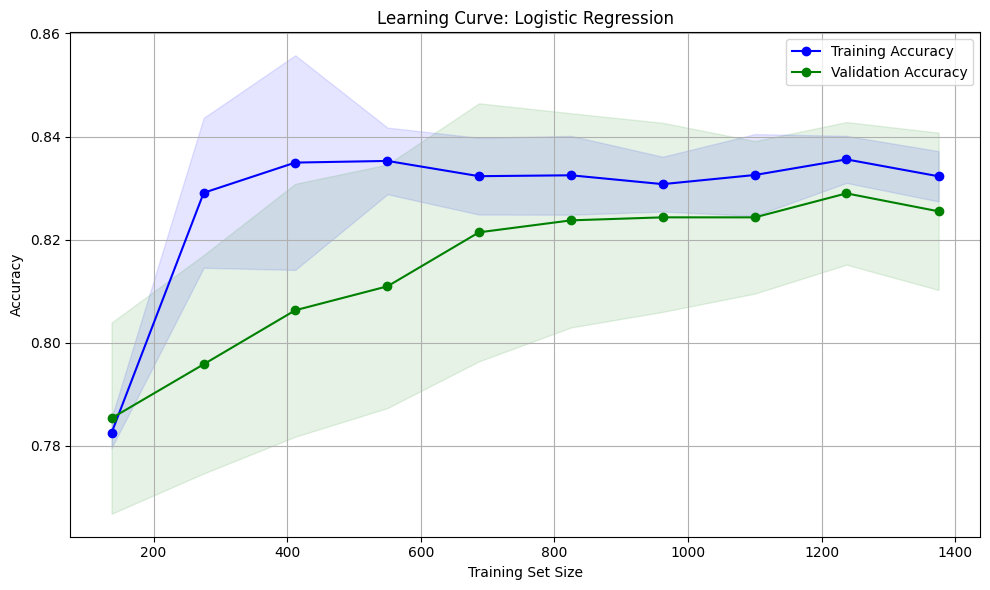

In [ ]:
logreg_for_curve = best_logreg

train_sizes, train_scores, val_scores = learning_curve(
    estimator=logreg_for_curve,
    X=X_train_scaled,
    y=y_train,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plotting
plt.figure(figsize=(10, 6))
plt.title("Learning Curve: Logistic Regression")
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Accuracy')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')

plt.plot(train_sizes, val_scores_mean, 'o-', color='green', label='Validation Accuracy')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color='green')

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("learning_curve_lg.png")
plt.show()

In [ ]:
# TESTING FUNCTION

def predict_with_probability(new_data):
    new_data_df = pd.DataFrame([new_data])
    new_data_scaled = scaler.transform(new_data_df)
    
    prediction = best_logreg.predict(new_data_scaled)[0]
    probability = best_logreg.predict_proba(new_data_scaled)[0][1] 
    
    return prediction, probability

In [21]:
# USAGE OF TESTING FUNC

# NEGATIVE - DARI DIHSEEK
input_data_dih_seek = {
    'Age': 75,
    'Gender': 1,
    'Ethnicity': 2,
    'EducationLevel': 1,
    'BMI': 26.5,
    'Smoking': 0,
    'AlcoholConsumption': 10.2,
    'PhysicalActivity': 5.8,
    'DietQuality': 6.3,
    'SleepQuality': 7.5,
    'FamilyHistoryAlzheimers': 0,
    'CardiovascularDisease': 0,
    'Diabetes': 0,
    'Depression': 0,
    'HeadInjury': 0,
    'Hypertension': 1,
    'SystolicBP': 135,
    'DiastolicBP': 85,
    'CholesterolTotal': 220.5,
    'CholesterolLDL': 120.3,
    'CholesterolHDL': 55.2,
    'CholesterolTriglycerides': 180.4,
    'MMSE': 24.5,
    'FunctionalAssessment': 7.2,
    'MemoryComplaints': 0,
    'BehavioralProblems': 0,
    'ADL': 2.1,
    'Confusion': 0,
    'Disorientation': 0,
    'PersonalityChanges': 0,
    'DifficultyCompletingTasks': 1,
    'Forgetfulness': 1
}

# POSITIVE - DARI CSV
input_data_61 = {
    'Age': 61,
    'Gender': 0,
    'Ethnicity': 0,
    'EducationLevel': 0,
    'BMI': 19.09,
    'Smoking': 0, 
    'AlcoholConsumption': 3.732,
    'PhysicalActivity': 0.37,
    'DietQuality': 4.125,
    'SleepQuality': 5.11,
    'FamilyHistoryAlzheimers': 0, 
    'CardiovascularDisease': 0, 
    'Diabetes': 1, 
    'Depression': 0, 
    'HeadInjury': 0, 
    'Hypertension': 0, 
    'SystolicBP': 171,
    'DiastolicBP': 115,
    'CholesterolTotal': 202.303,
    'CholesterolLDL': 128.555,
    'CholesterolHDL': 67.64,
    'CholesterolTriglycerides': 119.334,
    'MMSE': 4.95,
    'FunctionalAssessment': 3.18,
    'MemoryComplaints': 0,
    'BehavioralProblems': 0,
    'ADL': 4.42,
    'Confusion': 0, 
    'Disorientation': 1, 
    'PersonalityChanges': 0, 
    'DifficultyCompletingTasks': 1, 
    'Forgetfulness': 1,
}

# POSITIVE - DARI CSV
input_data_75 = {
    'Age': 75,
    'Gender': 0,
    'Ethnicity': 0,
    'EducationLevel': 0,
    'BMI': 18.776,
    'Smoking': 0, 
    'AlcoholConsumption': 13.723,
    'PhysicalActivity': 4.469,
    'DietQuality': 8.341,
    'SleepQuality': 4.213,
    'FamilyHistoryAlzheimers': 0, 
    'CardiovascularDisease': 0, 
    'Diabetes': 0, 
    'Depression': 0, 
    'HeadInjury': 0, 
    'Hypertension': 0, 
    'SystolicBP': 117,
    'DiastolicBP': 63,
    'CholesterolTotal': 151.383,
    'CholesterolLDL': 69.623,
    'CholesterolHDL': 77.346,
    'CholesterolTriglycerides': 210.5,
    'MMSE': 10.139,
    'FunctionalAssessment': 3.401,
    'MemoryComplaints': 0,
    'BehavioralProblems': 0,
    'ADL': 4.517,
    'Confusion': 1, 
    'Disorientation': 0, 
    'PersonalityChanges': 0, 
    'DifficultyCompletingTasks': 0, 
    'Forgetfulness': 1,
}

# NEGATIVE - DARI CSV
input_data_78 = {
    'Age': 78,
    'Gender': 0,
    'Ethnicity': 0,
    'EducationLevel': 2,
    'BMI': 22.463,
    'Smoking': 1, 
    'AlcoholConsumption': 19.300,
    'PhysicalActivity': 3.834,
    'DietQuality': 8.279,
    'SleepQuality': 8.312,
    'FamilyHistoryAlzheimers': 0, 
    'CardiovascularDisease': 0, 
    'Diabetes': 1, 
    'Depression': 0, 
    'HeadInjury': 0, 
    'Hypertension': 1, 
    'SystolicBP': 165,
    'DiastolicBP': 97,
    'CholesterolTotal': 254.586,
    'CholesterolLDL': 132.960,
    'CholesterolHDL': 39.009,
    'CholesterolTriglycerides': 344.448,
    'MMSE': 21.205,
    'FunctionalAssessment': 5.568,
    'MemoryComplaints': 0,
    'BehavioralProblems': 0,
    'ADL': 5.467,
    'Confusion': 0, 
    'Disorientation': 1, 
    'PersonalityChanges': 0, 
    'DifficultyCompletingTasks': 1, 
    'Forgetfulness': 1,
}

prediction, probability = predict_with_probability(input_data_dih_seek) # Ganti aja mau pilih yg mana
print(f"\nExample Prediction: {prediction} (0 = No Alzheimer's, 1 = Alzheimer's)")
print(f"Probability of Alzheimer's: {probability:.2%}")


Example Prediction: 0 (0 = No Alzheimer's, 1 = Alzheimer's)
Probability of Alzheimer's: 15.07%
